In [6]:
%load_ext autoreload
%autoreload 2
from ani2x import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [5]:
import matplotlib.pyplot as plt

In [2]:
pdb_bind_path = './data/pdb_bind_ani2x_6_angstrom.csv'
df_data = pd.read_csv(pdb_bind_path, index_col=0)

In [106]:
def get_list(name):
    with open(f'./losses/{name}.txt', 'r') as f:
        lines = f.readlines()
        lines = [float(line.rstrip('\n')) for line in lines]
    return lines

def get_losses_kind(kind, train_valid, n_models=8):
    losses = []
    for i in range(n_models):
        name = f'{train_valid}_losses_{kind}_{i}'
        losses.append(get_list(name))
    return np.array(losses)

In [107]:
losses_pre_train = get_losses_kind('pre', 'train')
losses_rand_train = get_losses_kind('rand', 'train')
losses_pre_valid = get_losses_kind('pre', 'valid')
losses_rand_valid = get_losses_kind('rand', 'valid')

(0.0, 4.0)

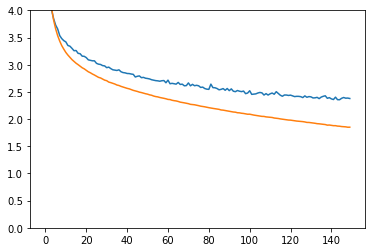

In [108]:
plt.plot(losses_pre_valid.mean(axis=0))
plt.plot(losses_pre_train.mean(axis=0));
plt.ylim(0, 4)


(0.0, 4.0)

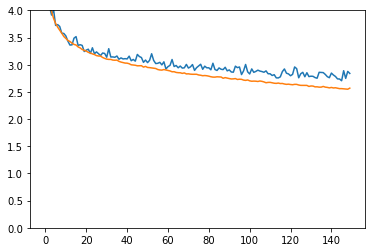

In [109]:
plt.plot(losses_rand_valid.mean(axis=0))
plt.plot(losses_rand_train.mean(axis=0));
plt.ylim(0, 4)

(0.0, 4.0)

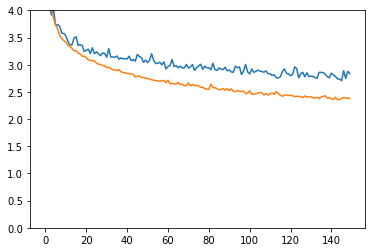

In [117]:
plt.plot(losses_rand_valid.mean(axis=0))
plt.plot(losses_pre_valid.mean(axis=0));
plt.ylim(0, 4);

In [23]:
df_data = load_df_data_6_angstrom()

In [52]:
df_data['species'] = df_data.species.map(lambda x: np.array(json.loads(x)))

In [61]:
df_data[df_data['species'].map(lambda entry: set(list(range(7))) == set(entry))]

,species,coordinates,affinity,Entry ID,Resolution,Release Year,pK,Refined
ID,,,,,,,,
244,"[0, 1, 0, 0, 2, 0, 1, 0, 0, 1, 3, 2, 0, 0, 0, ...","[[43.793, 48.954, 31.238], [43.519, 49.582, 29...",2.30,1JDJ,2.20,2002,2.30,False
554,"[0, 0, 3, 1, 0, 0, 1, 0, 0, 0, 1, 3, 0, 0, 3, ...","[[5.321, 19.511, 17.104], [5.804, 18.915, 19.1...",2.85,4LUV,1.40,2013,2.85,False
863,"[0, 0, 2, 0, 1, 1, 3, 1, 0, 1, 0, 0, 1, 0, 0, ...","[[-5.053, -16.176, 12.531], [-5.23, -19.309, 1...",3.15,4LW1,1.63,2013,3.15,False
1055,"[1, 1, 1, 1, 1, 3, 2, 1, 1, 3, 1, 1, 3, 2, 0, ...","[[-116.863, -183.653, 318.565], [-124.185, -17...",3.30,5OUL,1.34,2018,3.30,False
1438,"[1, 0, 1, 3, 1, 0, 2, 0, 1, 0, 1, 3, 1, 0, 0, ...","[[7.072, 16.453, -28.496], [7.039, 17.064, -27...",3.60,1UYS,2.80,2004,3.60,False
...,...,...,...,...,...,...,...,...
19192,"[2, 0, 0, 0, 1, 1, 3, 1, 1, 4, 1, 2, 0, 1, 1, ...","[[8.8, -27.137, 3.55], [9.21, -27.354, 2.619],...",10.42,4WT2,1.42,2014,10.42,True
19193,"[1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 3, 0, 2, ...","[[-15.873, -22.911, 21.151], [-15.816, -21.563...",10.42,5OHJ,1.60,2017,10.42,False
19260,"[2, 0, 0, 0, 1, 1, 3, 1, 1, 1, 1, 2, 0, 1, 1, ...","[[42.087, -11.692, 34.011], [41.565, -12.472, ...",10.70,5WB6,2.35,2017,10.70,False


In [133]:
empty_pdb_ids = set([pdb_id for pdb_id, elements in problem_pdb_ids.items() if len(elements) == 1])

In [185]:
# with open('./empty_pdb_ids.txt', 'w+') as f:
#     for line in list(empty_pdb_ids):
#         f.write(f"{line}\n")

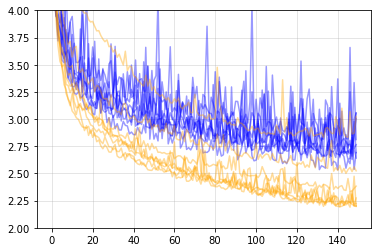

In [142]:
for loss in losses_rand_valid:
    plt.plot(loss, color='blue', alpha=0.4)
for loss in losses_pre_valid:
    plt.plot(loss, color='orange', alpha=0.4)
plt.grid(alpha=0.4)
plt.ylim(2, 4);

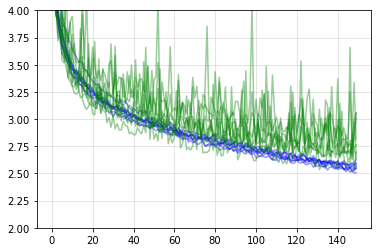

In [111]:
for loss in losses_rand_train:
    plt.plot(loss, color='blue', alpha=0.4)
for loss in losses_rand_valid:
    plt.plot(loss, color='green', alpha=0.4)
plt.grid(alpha=0.4)
plt.ylim(2, 4);

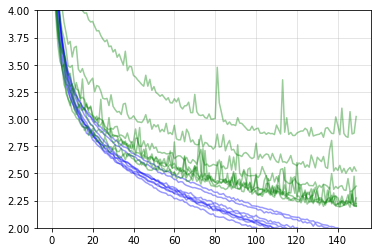

In [112]:
for loss in losses_pre_train:
    plt.plot(loss, color='blue', alpha=0.4)
for loss in losses_pre_valid:
    plt.plot(loss, color='green', alpha=0.4)
plt.grid(alpha=0.4)
plt.ylim(2, 4);

In [124]:
np.mean([np.min(loss) for loss in losses_pre_valid]) / np.mean([np.min(loss) for loss in losses_rand_valid])

0.8756908426899613

In [3]:
data_casf = load_data_6_angstrom_refined(remove_casf=False)

In [8]:
model_pres = [load_best_model(id_=i, kind='pre') for i in range(N_MODELS)]
model_rands = [load_best_model(id_=i, kind='rand') for i in range(N_MODELS)]

In [9]:
consts_ani2x = get_consts_ani2x()
aev_computer_ani2x = get_aev_computer(consts_ani2x)

/usr/local/Caskroom/miniconda/base/lib/python3.9/site-packages/torch/functional.py:1069: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at  /Users/distiller/project/conda/conda-bld/pytorch_1640812094853/work/aten/src/ATen/native/TensorShape.cpp:2157.)
  return _VF.cartesian_prod(tensors)  # type: ignore[attr-defined]


In [20]:
n_casf = len(data_casf)


In [14]:
testloader = get_data_loader(dataset=data_casf, batchsize=n_casf, shuffle=False)

In [41]:
output_pres = [get_model_output(model_pres[i], aev_computer_ani2x, testloader) for i in range(N_MODELS)]
output_rands = [get_model_output(model_rands[i], aev_computer_ani2x, testloader) for i in range(N_MODELS)]

In [42]:
output_pres = np.array(output_pres)
output_rands = np.array(output_rands)
output_pres_mean = output_pres.mean(axis=0)
output_rands_mean = output_rands.mean(axis=0)
labels = get_labels(testloader)

In [56]:
np.corrcoef(output_rands)

array([[1.        , 0.98378314, 0.9864989 , 0.98431085, 0.98332329,
        0.98609083, 0.98555935, 0.97936934],
       [0.98378314, 1.        , 0.98152614, 0.98280887, 0.9836083 ,
        0.98538489, 0.98686616, 0.98243616],
       [0.9864989 , 0.98152614, 1.        , 0.98129188, 0.98481569,
        0.98596477, 0.98406669, 0.98136575],
       [0.98431085, 0.98280887, 0.98129188, 1.        , 0.97868326,
        0.98578216, 0.98246211, 0.97626784],
       [0.98332329, 0.9836083 , 0.98481569, 0.97868326, 1.        ,
        0.98431483, 0.98414053, 0.98171628],
       [0.98609083, 0.98538489, 0.98596477, 0.98578216, 0.98431483,
        1.        , 0.98434666, 0.98260064],
       [0.98555935, 0.98686616, 0.98406669, 0.98246211, 0.98414053,
        0.98434666, 1.        , 0.98299802],
       [0.97936934, 0.98243616, 0.98136575, 0.97626784, 0.98171628,
        0.98260064, 0.98299802, 1.        ]])

In [ ]:
np.triu(np.corrcoef(output_pres, dtype='float16'))

array([[1.    , 0.961 , 0.9614, 0.955 , 0.953 , 0.959 , 0.9614, 0.963 ],
       [0.    , 0.9995, 0.962 , 0.957 , 0.955 , 0.964 , 0.967 , 0.9673],
       [0.    , 0.    , 0.9995, 0.9575, 0.9497, 0.964 , 0.968 , 0.954 ],
       [0.    , 0.    , 0.    , 1.    , 0.953 , 0.9595, 0.962 , 0.9556],
       [0.    , 0.    , 0.    , 0.    , 1.    , 0.946 , 0.9497, 0.9556],
       [0.    , 0.    , 0.    , 0.    , 0.    , 1.    , 0.9688, 0.964 ],
       [0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 1.    , 0.9697],
       [0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.9995]],
      dtype=float16)

In [65]:
np.triu(np.corrcoef(output_rands, dtype='float16'))

array([[1.    , 0.984 , 0.9863, 0.985 , 0.9834, 0.985 , 0.985 , 0.9795],
       [0.    , 0.9995, 0.9814, 0.983 , 0.9834, 0.985 , 0.9863, 0.982 ],
       [0.    , 0.    , 1.    , 0.9814, 0.9844, 0.9863, 0.9844, 0.9814],
       [0.    , 0.    , 0.    , 1.    , 0.979 , 0.9863, 0.9824, 0.975 ],
       [0.    , 0.    , 0.    , 0.    , 1.    , 0.984 , 0.984 , 0.9814],
       [0.    , 0.    , 0.    , 0.    , 0.    , 0.9995, 0.984 , 0.982 ],
       [0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 1.    , 0.9824],
       [0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 1.    ]],
      dtype=float16)

In [69]:
get_corr(output_pres_mean, labels) - np.mean([get_corr(output_pres[i], labels) for i in range(N_MODELS)])

0.01423210160511057

In [70]:
get_corr(output_rands_mean, labels) - np.mean([get_corr(output_rands[i], labels) for i in range(N_MODELS)])

0.005367384624297422

In [45]:
get_corr(output_rands_mean, labels)

0.7390922327671708

In [46]:
get_corr(output_pres_mean, labels)

0.7870792496982705

In [71]:
get_corr(output_pres_mean, labels) - get_corr(output_rands_mean, labels)

0.047987016931099635

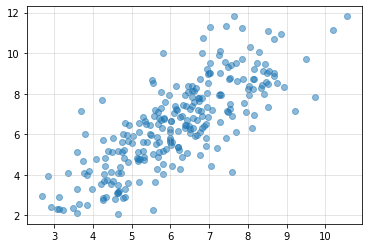

In [49]:
plt.scatter(output_pres_mean, labels, alpha=0.5)
plt.grid(alpha=0.4);

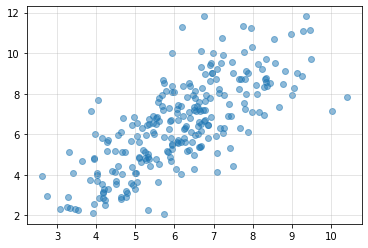

In [50]:
plt.scatter(output_rands_mean, labels, alpha=0.5)
plt.grid(alpha=0.4);

In [68]:
# [f for f in model_pre['H'][:5].named_parameters()]
# model_pre['H'][:5].state_dict()
# layer = torch.nn.Linear(in_features=160, out_features=100)
# torch.nn.Sequential(model_pre['H'][:5], layer)
# [f for f in model_pre.named_parameters()]